
# Extract


In [0]:
!unrar e "/content/drive/My Drive/newresearchproject.rar" "/content/dataset/"

Streaming output truncated to the last 5000 lines.
Extracting  /content/dataset/SPRING0174_0052.jpg                          92%  OK 
Extracting  /content/dataset/SPRING0174_0053.jpg                          92%  OK 
Extracting  /content/dataset/SPRING0174_0054.jpg                          92%  OK 
Extracting  /content/dataset/SPRING0174_0055.jpg                          92%  OK 
Extracting  /content/dataset/SPRING0174_0056.jpg                          92%  OK 
Extracting  /content/dataset/SPRING0174_0057.jpg                          92%  OK 
Extracting  /content/dataset/SPRING0174_0058.jpg                          92%  OK 
Extracting  /content/dataset/SPRING0174_0059.jpg                          92%  OK 
Extracting  /content/dataset/SPRING0174_0060.jpg                          92%  OK 
Extracting  /content/dataset/SPRING0174_0061.jpg                          92%  OK 
Extracting  /content/dataset/

In [0]:
import zipfile
from google.colab import drive

zip_ref = zipfile.ZipFile("/content/drive/My Drive/testimg6000.zip", 'r')
zip_ref.extractall("/content/test/")
zip_ref.close()

# Loading data Train and Test


In [0]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [0]:
df1=pd.read_csv("/content/all_labels_female_corrected.csv")
df2=pd.read_csv("/content/all_labels_male_corrected.csv")
dft1=pd.read_csv("/content/all_labels_female_test.csv")
dft2=pd.read_csv("/content/all_labels_male_test.csv")

In [0]:
namedf=[]
pcdf=[]

In [0]:
def load_train(df,tdf,gender):
  global namedf,pcdf
  train_img=[]
  train_label=[]
  
  if gender=="Male" or gender=="male":

    for i in tqdm(range(len(tdf))):
      final_path=os.path.join('/content/test/6000 images for testing',tdf.name.iloc[i]) #get image path
      img=cv2.imread(final_path) #read
      img=cv2.resize(img,(224,448))
      train_img.append(img)
      train_label.append(np.asarray([tdf.iloc[i][0],tdf.iloc[i][3]]))
      namedf.append(tdf.name.iloc[i])
      pcdf.append(tdf.iloc[i][0:10])

    for i in tqdm(range(len(df))):
      if int(df.name.iloc[i][11:15])==0:
        continue
      final_path=os.path.join('/content/dataset',df.name.iloc[i]) #get image path
      img=cv2.imread(final_path) #read
      img=cv2.resize(img,(224,448))
      train_img.append(img)
      train_label.append(np.asarray([df.iloc[i][0],df.iloc[i][3]]))
      namedf.append(df.name.iloc[i])
      pcdf.append(df.iloc[i][0:10])

  elif gender=="Female" or gender=="female":

    for i in tqdm(range(len(tdf))):
      final_path=os.path.join('/content/test/6000 images for testing',tdf.name.iloc[i]) #get image path
      img=cv2.imread(final_path) #read
      img=cv2.resize(img,(224,448))
      train_img.append(img)
      train_label.append(np.asarray([tdf.iloc[i][0],tdf.iloc[i][2]]))
      namedf.append(tdf.name.iloc[i])
      pcdf.append(tdf.iloc[i][0:10])

    for i in tqdm(range(len(df))):
      # rejecting 0000 images because they are same as 0100
      if int(df.name.iloc[i][11:15])==0:
        continue
      final_path=os.path.join('/content/dataset',df.name.iloc[i]) #get image path
      img=cv2.imread(final_path) #read
      img=cv2.resize(img,(224,448))
      train_img.append(img)
      train_label.append(np.asarray([df.iloc[i][0],df.iloc[i][2]]))
      namedf.append(df.name.iloc[i])
      pcdf.append(df.iloc[i][0:10])
  
    
  return train_img,train_label

In [0]:
train_img,train_label=load_train(df2,dft2,'male')

In [0]:
train=np.asarray(train_img) #converting to 4d numpy array req for model
train_label=np.asarray(train_label).astype(np.float32)

In [0]:
del train_img # deleting unneccesary list to clear ram

# Splitting on val and test


In [0]:
#splitting into val and train
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val=train_test_split(train,train_label,test_size=0.2, random_state=42)
del train

In [0]:
X_train, X_test, y_train, y_test=train_test_split(X_train,y_train,test_size=0.125, random_state=42)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(23121, 448, 224, 3)
(3303, 448, 224, 3)
(6606, 448, 224, 3)
(23121, 2)
(3303, 2)
(6606, 2)


# Models


In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers as L
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [0]:
#make resnet50
model_fn=ResNet50(include_top=False, input_shape=(448,224,3),pooling='avg')
model1=tf.keras.models.Sequential()
model1.add(model_fn)
model1.add(L.Dense(256,activation='relu'))
model1.add(L.Dense(2,activation='linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 24,112,770
Trainable params: 24,059,650
Non-trainable params: 53,120
_________________________________________________________________


In [0]:
#inceptionv3
model_fn=InceptionV3(include_top=False, input_shape=(448,224,3),pooling='avg')
model2=tf.keras.models.Sequential()
model2.add(model_fn)
model2.add(L.Dense(256,activation='relu'))
model2.add(L.Dense(2,activation='linear'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense_2 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 22,327,842
Trainable params: 22,293,410
Non-trainable params: 34,432
_________________________________________________________________


# Load Weights

In [0]:
model1.load_weights("/content/drive/My Drive/all_male_resnet.h5") # model weights path

In [0]:
model2.load_weights("/content/drive/My Drive/all_inception_male.h5") # model weights path

In [0]:
# predicting on all train,val and test with resnet
train_arr1=model1.predict(X_train)
val_arr1=model1.predict(X_val)
test_arr1=model1.predict(X_test)

In [0]:
#predicting on all train,val and test with inception
train_arr2=model2.predict(X_train)
val_arr2=model2.predict(X_val)
test_arr2=model2.predict(X_test)

In [0]:
#converting labels to dataframe for slicing
train_label=pd.DataFrame(y_train)
val_label=pd.DataFrame(y_val)
test_label=pd.DataFrame(y_test)

# Test on Train.

In [0]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [21]:
##testing resnet
#testing height
print(mean_squared_error(train_label[0],train_arr1[:,0]))
print(mean_absolute_error(train_label[0],train_arr1[:,0]))
#testing belly
print(mean_squared_error(train_label[1],train_arr1[:,1]))
print(mean_absolute_error(train_label[1],train_arr1[:,1]))

0.0023439925
0.041329727
0.00073661224
0.021934493


In [22]:
##testing inception
#testing height
print(mean_squared_error(train_label[0],train_arr2[:,0]))
print(mean_absolute_error(train_label[0],train_arr2[:,0]))
#testing belly
print(mean_squared_error(train_label[1],train_arr2[:,1]))
print(mean_absolute_error(train_label[1],train_arr2[:,1]))

0.005659779
0.06253457
0.008141531
0.082047306


# Test on Val


In [23]:
#resnet
#testing height
print(mean_squared_error(val_label[0],val_arr1[:,0]))
print(mean_absolute_error(val_label[0],val_arr1[:,0]))
#testing belly
print(mean_squared_error(val_label[1],val_arr1[:,1]))
print(mean_absolute_error(val_label[1],val_arr1[:,1]))

0.007136847
0.06583703
0.009150235
0.07056888


In [24]:
#inception
#testing height
print(mean_squared_error(val_label[0],val_arr2[:,0]))
print(mean_absolute_error(val_label[0],val_arr2[:,0]))
#testing belly
print(mean_squared_error(val_label[1],val_arr2[:,1]))
print(mean_absolute_error(val_label[1],val_arr2[:,1]))

0.010722556
0.08245618
0.015337081
0.10024508


# Test on Test dataset


In [25]:
#resnet
#testing height
print(mean_squared_error(test_label[0],test_arr1[:,0]))
print(mean_absolute_error(test_label[0],test_arr1[:,0]))
#testing belly
print(mean_squared_error(test_label[1],test_arr1[:,1]))
print(mean_absolute_error(test_label[1],test_arr1[:,1]))

0.0073099765
0.06667039
0.00984494
0.07269991


In [26]:
#testing throughout the dataset inception
#testing height
print(mean_squared_error(test_label[0],test_arr2[:,0]))
print(mean_absolute_error(test_label[0],test_arr2[:,0]))
#testing belly
print(mean_squared_error(test_label[1],test_arr2[:,1]))
print(mean_absolute_error(test_label[1],test_arr2[:,1]))

0.010476783
0.08078688
0.01576064
0.10009251


# Front and Back test



In [0]:
def load_front(df,tdf,gender):
  front_img=[]
  front_label=[]
  if gender=="Male" or gender=="male":
    for i in tqdm(range(len(tdf))):
      if int(tdf.name.iloc[i][13:15])==1:
        final_path=os.path.join('/content/test/6000 images for testing',tdf.name.iloc[i]) #get image path
        img=cv2.imread(final_path) #read
        img=cv2.resize(img,(224,448))
        front_img.append(img)
        front_label.append(np.asarray([tdf.iloc[i][0],tdf.iloc[i][3]]))

    for i in tqdm(range(len(df))):
      if int(df.name.iloc[i][13:15])==1:
        final_path=os.path.join('/content/dataset',df.name.iloc[i]) #get image path
        img=cv2.imread(final_path) #read
        img=cv2.resize(img,(224,448))
        front_img.append(img)
        front_label.append(np.asarray([df.iloc[i][0],df.iloc[i][3]]))

  if gender=="Female" or gender=="female":
    for i in tqdm(range(len(tdf))):
      if int(tdf.name.iloc[i][13:15])==1:
        final_path=os.path.join('/content/test/6000 images for testing',tdf.name.iloc[i]) #get image path
        img=cv2.imread(final_path) #read
        img=cv2.resize(img,(224,448))
        front_img.append(img)
        front_label.append(np.asarray([tdf.iloc[i][0],tdf.iloc[i][2]]))

    for i in tqdm(range(len(df))):
      if int(df.name.iloc[i][13:15])==1:
        final_path=os.path.join('/content/dataset',df.name.iloc[i]) #get image path
        img=cv2.imread(final_path) #read
        img=cv2.resize(img,(224,448))
        front_img.append(img)
        front_label.append(np.asarray([df.iloc[i][0],df.iloc[i][2]]))


  return front_img,pd.DataFrame(front_label)

In [0]:
def load_back(df,tdf,gender):
  back_img=[]
  back_label=[]
  if gender=="Male" or gender=="male":
    for i in tqdm(range(len(tdf))):
      if int(tdf.name.iloc[i][13:15])==50:
        final_path=os.path.join('/content/test/6000 images for testing',tdf.name.iloc[i]) #get image path
        img=cv2.imread(final_path) #read
        img=cv2.resize(img,(224,448))
        back_img.append(img)
        back_label.append(np.asarray([tdf.iloc[i][0],tdf.iloc[i][3]]))

    for i in tqdm(range(len(df))):
      if int(df.name.iloc[i][13:15])==50:
        final_path=os.path.join('/content/dataset',df.name.iloc[i]) #get image path
        img=cv2.imread(final_path) #read
        img=cv2.resize(img,(224,448))
        back_img.append(img)
        back_label.append(np.asarray([df.iloc[i][0],df.iloc[i][3]]))

  if gender=="Female" or gender=="female":
    for i in tqdm(range(len(tdf))):
      if int(tdf.name.iloc[i][13:15])==50:
        final_path=os.path.join('/content/test/6000 images for testing',tdf.name.iloc[i]) #get image path
        img=cv2.imread(final_path) #read
        img=cv2.resize(img,(224,448))
        back_img.append(img)
        back_label.append(np.asarray([tdf.iloc[i][0],tdf.iloc[i][2]]))

    for i in tqdm(range(len(df))):
      if int(df.name.iloc[i][13:15])==50:
        final_path=os.path.join('/content/dataset',df.name.iloc[i]) #get image path
        img=cv2.imread(final_path) #read
        img=cv2.resize(img,(224,448))
        back_img.append(img)
        back_label.append(np.asarray([df.iloc[i][0],df.iloc[i][2]]))


  return back_img,pd.DataFrame(back_label)

In [29]:
front_img,front_label=load_front(df2,dft2,"male")

In [30]:
back_img,back_label=load_back(df2,dft2,"male")

In [0]:
#predicting
res_front=model1.predict(np.asarray(front_img))

In [0]:
#predicting
res_back=model1.predict(np.asarray(back_img))

In [33]:
print("mse and mae for front images for height:")
print(f"mse :{mean_squared_error(res_front[:,0],front_label[0])}")
print(f"mae :{mean_absolute_error(res_front[:,0],front_label[0])}")
print("mse and mae for front images for belly:")
print(f"mse :{mean_squared_error(res_front[:,1],front_label[1])}")
print(f"mae :{mean_absolute_error(res_front[:,1],front_label[1])}")

mse and mae for front images for height:
mse :0.003857713549219931
mae :0.049336427225365756
mse and mae for front images for belly:
mse :0.0016711926126732873
mae :0.030879365451443014


In [34]:
print("mse and mae for back images for height:")
print(f"mse :{mean_squared_error(res_back[:,0],back_label[0])}")
print(f"mae :{mean_absolute_error(res_back[:,0],back_label[0])}")
print("mse and mae for back images for belly:")
print(f"mse :{mean_squared_error(res_back[:,1],back_label[1])}")
print(f"mae :{mean_absolute_error(res_back[:,1],back_label[1])}")

mse and mae for back images for height:
mse :0.004430989763142072
mae :0.054880377277897324
mse and mae for back images for belly:
mse :0.0023695208899255876
mae :0.03489893161500837


In [0]:
res_front=model2.predict(np.asarray(front_img))

In [0]:
res_back=model2.predict(np.asarray(back_img))

In [37]:
print("mse and mae for front images for height:")
print(f"mse :{mean_squared_error(res_front[:,0],front_label[0])}")
print(f"mae :{mean_absolute_error(res_front[:,0],front_label[0])}")
print("mse and mae for front images for belly:")
print(f"mse :{mean_squared_error(res_front[:,1],front_label[1])}")
print(f"mae :{mean_absolute_error(res_front[:,1],front_label[1])}")

mse and mae for front images for height:
mse :0.007144117175071113
mae :0.06905115227736977
mse and mae for front images for belly:
mse :0.009175221666557203
mae :0.0852826047021371


In [38]:
print("mse and mae for back images for height:")
print(f"mse :{mean_squared_error(res_back[:,0],back_label[0])}")
print(f"mae :{mean_absolute_error(res_back[:,0],back_label[0])}")
print("mse and mae for back images for belly:")
print(f"mse :{mean_squared_error(res_back[:,1],back_label[1])}")
print(f"mae :{mean_absolute_error(res_back[:,1],back_label[1])}")

mse and mae for back images for height:
mse :0.006473023327244463
mae :0.06447969610995957
mse and mae for back images for belly:
mse :0.009578754957251441
mae :0.08758578362096295


# Training logs plot

In [0]:
log_df1=pd.read_csv("/content/drive/My Drive/all_log_resnet_female.csv")
log_df2=pd.read_csv("/content/drive/My Drive/all_log_resnet_male.csv")
log_df3=pd.read_csv("/content/drive/My Drive/all_log_inception_male.csv")
log_df4=pd.read_csv("/content/drive/My Drive/all_log_inception_female.csv")

In [40]:
log_df1.head()

,Unnamed: 0,loss,mean_absolute_error,val_loss,val_mean_absolute_error,lr
0,0,1.541735,0.860983,2.996351,1.524811,0.001
1,1,0.556978,0.546125,64.912041,5.612718,0.001
2,2,0.367851,0.454692,6.955937,1.610430,0.001
3,3,0.218413,0.356260,3.145978,0.993485,0.001
4,4,0.160374,0.307500,21.738821,2.977943,0.001


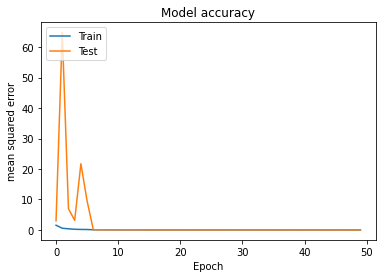

In [41]:
import matplotlib.pyplot as plt
plt.plot(log_df1['loss'])
plt.plot(log_df1['val_loss'])
plt.title('Model accuracy')
plt.ylabel('mean squared error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

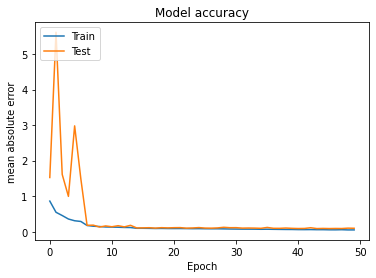

In [42]:
import matplotlib.pyplot as plt
plt.plot(log_df1['mean_absolute_error'])
plt.plot(log_df1['val_mean_absolute_error'])
plt.title('Model accuracy')
plt.ylabel('mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

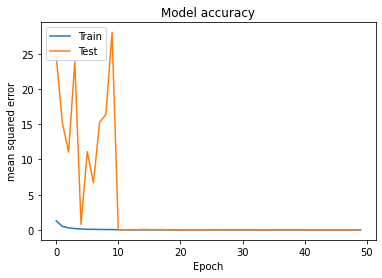

In [43]:
import matplotlib.pyplot as plt
plt.plot(log_df2['loss'])
plt.plot(log_df2['val_loss'])
plt.title('Model accuracy')
plt.ylabel('mean squared error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

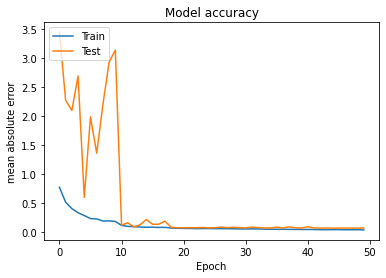

In [44]:
import matplotlib.pyplot as plt
plt.plot(log_df2['mean_absolute_error'])
plt.plot(log_df2['val_mean_absolute_error'])
plt.title('Model accuracy')
plt.ylabel('mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

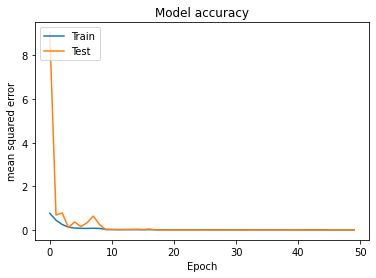

In [45]:
import matplotlib.pyplot as plt
plt.plot(log_df3['loss'])
plt.plot(log_df3['val_loss'])
plt.title('Model accuracy')
plt.ylabel('mean squared error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

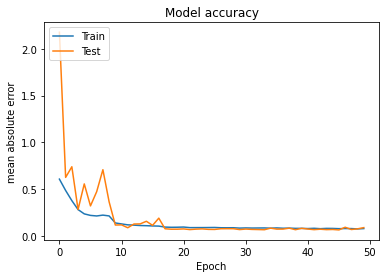

In [46]:
import matplotlib.pyplot as plt
plt.plot(log_df3['mean_absolute_error'])
plt.plot(log_df3['val_mean_absolute_error'])
plt.title('Model accuracy')
plt.ylabel('mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

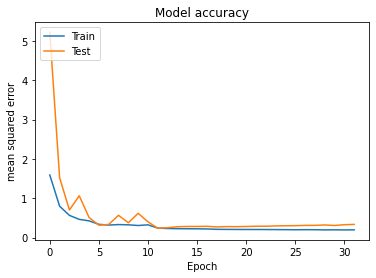

In [47]:
import matplotlib.pyplot as plt
plt.plot(log_df4['loss'])
plt.plot(log_df4['val_loss'])
plt.title('Model accuracy')
plt.ylabel('mean squared error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

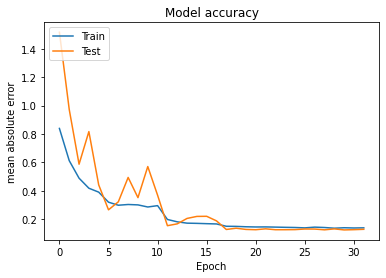

In [48]:
import matplotlib.pyplot as plt
plt.plot(log_df4['mean_absolute_error'])
plt.plot(log_df4['val_mean_absolute_error'])
plt.title('Model accuracy')
plt.ylabel('mean absolute error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Generating Predict





In [0]:
#splitting into val and train
X_train_name, X_val_name= train_test_split(namedf,test_size=0.2, random_state=42)
X_train_name, X_test_name = train_test_split(X_train_name,test_size=0.125, random_state=42)

In [0]:
out_train=pd.DataFrame(train_arr1)
out_train['name']=X_train_name
out_train.to_excel("/content/drive/My Drive/output_pred_files/resnet_male_preds_train.xlsx",index=False)
out_val=pd.DataFrame(val_arr1)
out_val['name']=X_val_name
out_val.to_excel("/content/drive/My Drive/output_pred_files/resnet_male_preds_val.xlsx",index=False)
out_test=pd.DataFrame(test_arr1)
out_test['name']=X_test_name
out_train.to_excel("/content/drive/My Drive/output_pred_files/resnet_male_preds_test.xlsx",index=False)

In [0]:
out_train=pd.DataFrame(train_arr2)
out_train['name']=X_train_name
out_train.to_excel("/content/drive/My Drive/output_pred_files/inception_male_preds_train.xlsx",index=False)
out_val=pd.DataFrame(val_arr2)
out_val['name']=X_val_name
out_val.to_excel("/content/drive/My Drive/output_pred_files/inception_male_preds_val.xlsx",index=False)
out_test=pd.DataFrame(test_arr2)
out_test['name']=X_test_name
out_train.to_excel("/content/drive/My Drive/output_pred_files/inception_male_preds_test.xlsx",index=False)

In [0]:
pcdf=pd.DataFrame(pcdf)
pcdf['name']=namedf

In [0]:
org_train, org_val= train_test_split(pcdf,test_size=0.2, random_state=42)
org_train, org_test = train_test_split(org_train,test_size=0.125, random_state=42)

In [0]:
org_train.to_csv('train_male.csv',index=False)
org_val.to_csv('val_male.csv',index=False)
org_test.to_csv('test_male.csv',index=False)